In [2]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess

# Linear regression and Polynomial regression

### Ground truth function

Data points written to data.csv


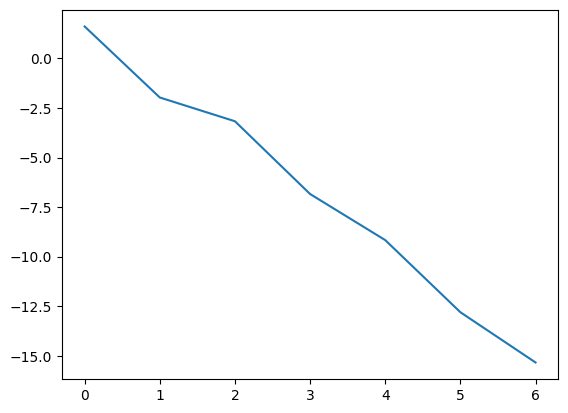

In [70]:
# Define the linear function
def linear(x):
    noise = 2*np.random.rand()
    return 1 + -3*x + noise

# Generate points
data_points = []
for x in range(0,7):  # Generating points from 0 to 40
    y = linear(x)
    data_points.append(y)

# Write points to CSV file
np.savetxt('data.csv', data_points, fmt='%d', delimiter='\n')

print("Data points written to data.csv")
plt.plot(data_points)
plt.show()

### Predicting with linear regression (making functions easy to convert to Verilog)

In [62]:
def partial_b(m,b,x,y):
    return 2*(b+m*x-y)

def partial_m(m,b,x,y):
    return 2*x*(b+m*x-y)

def update_ab(m,b,alph,x,y):
    b_new = b - alph * partial_b(m,b,x,y) 
    m_new = m - alph * partial_m(m,b,x,y) 
    return b_new, m_new

40.0
40.0
117.60000000000001
195.20000000000002
263.536
633.008
407.62464
1209.36256
558.5358912
1963.918816
631.694915456
2402.8729615360003
662.65880253184
2619.6201710668806
2.6196201710668805
0.6626588025318401


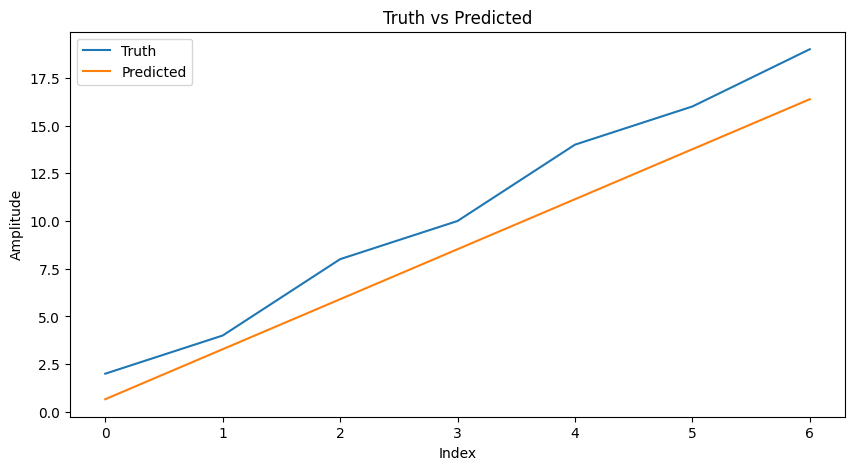

In [67]:
# Read data from file
data_file = "data.csv"
with open(data_file, "r") as file:
    lines = file.readlines()
d = []
for line in lines:
    d.append(int(line))


alph = 0.01 # Learning rate
b = 0
m = 0

for i in range(len(d)):
    b, m = update_ab(m,b,alph,i+1,d[i])
    print(b*1000)
    print(m*1000)


print(m)
print(b)


y_pred = []
for i in range(len(d)):
    y_pred.append(m*i+b)

plt.figure(figsize=(10, 5))  # Adjust the figure size if needed

# Plot truth
plt.plot(d, linestyle='-', label='Truth')

# Plot predicted
plt.plot(y_pred, linestyle='-', label='Predicted')

plt.title('Truth vs Predicted')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()  

plt.show()

### Predicting with 3 degree polynomial

In [33]:
# cost function:            J = 1/n sum(i=0 to n)(h(x_i)-y_i)^2
# gradient descent:         th_j := th_j - alph dJ/dth

# partials
# batch size of 1
def partial_a0(a0,a1,a2,a3,x,y):
    return 2*(a0+a1*x+a2*np.power(x,2)+a3*np.power(x,3)-y)

def partial_a1(a0,a1,a2,a3,x,y):
    return 2*x*(a0+a1*x+a2*np.power(x,2)+a3*np.power(x,3)-y)

def partial_a2(a0,a1,a2,a3,x,y):
    return 2*np.power(x,2)*(a0+a1*x+a2*np.power(x,2)+a3*np.power(x,3)-y)

def partial_a3(a0,a1,a2,a3,x,y):
    return 2*np.power(x,3)*(a0+a1*x+a2*np.power(x,2)+a3*np.power(x,3)-y)

In [34]:
# gradient descent
def update_a(a0,a1,a2,a3,alph,x,y):
    a0_new = a0 - alph * partial_a0(a0,a1,a2,a3,x,y) 
    a1_new = a1 - alph * partial_a1(a0,a1,a2,a3,x,y) 
    a2_new = a2 - alph * partial_a2(a0,a1,a2,a3,x,y) 
    a3_new = a3 - alph * partial_a3(a0,a1,a2,a3,x,y) 
    return a0_new, a1_new, a2_new, a3_new

In [35]:
# third order polynomial function
def poly3(a0,a1,a2,a3,x):
    return a0 + a1*x + a2*np.power(x,2) + a3*np.power(x,3)

-2.0213403766312728e+177
-8.085361533129718e+178
-3.2341446236276915e+180
-1.2936578534976402e+182


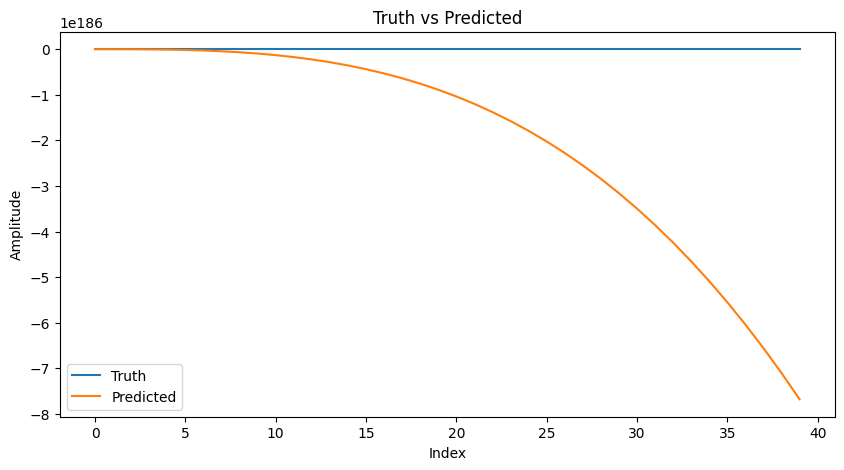

In [36]:
# Read data from file
data_file = "data.csv"
with open(data_file, "r") as file:
    lines = file.readlines()
d = []
for line in lines:
    d.append(int(line))


alph = 0.001 # Learning rate
a0 = 0
a1 = 0
a2 = 0
a3 = 0

for i in range(len(d)):
    a0, a1, a2, a3 = update_a(a0,a1,a2,a3,alph,i+1,d[i])


print(a0)
print(a1)
print(a2)
print(a3)

y_pred = []
for i in range(len(d)):
    y_pred.append(poly3(a0,a1,a2,a3,i))

plt.figure(figsize=(10, 5))  # Adjust the figure size if needed

# Plot truth
plt.plot(d, linestyle='-', label='Truth')

# Plot predicted
plt.plot(y_pred, linestyle='-', label='Predicted')

plt.title('Truth vs Predicted')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()  

plt.show()

# ChatGPT method :\(

503.33571428571435
1000.7928571428571
506.66685428571435
1001.5846342857142
509.99342627057155
1002.3753329088572
513.3154365022614
1003.1649544905423
516.6328912341755
1003.9535005069997
519.9457967111333
1004.7409724324359
523.2541591693933
1005.5273717390365
526.5579848366657
1006.3126998969689
529.8572799321233
1007.0969583743854
533.1520506664135
1007.8801486374253
536.4423032416702
1008.6622721502188
539.7280438515253
1009.4433303748884
543.0092786811201
1010.2233247715526
546.2860139071175
1011.0022567983283
549.558255697713
1011.7801279113335
552.8260102126469
1012.5569395646901
556.0892836032153
1013.3326932105268
559.3480820122822
1014.1073902989821
562.602411574291
1014.8810322782056
565.8522784152752
1015.6536205943627
569.0976886528714
1016.4251566916358
572.3386483963294
1017.195642012228
575.5751637465248
1017.9650779963649
578.8072407959698
1018.7334660822984
582.0348856288247
1019.5008077063086
585.2581043209096
1020.2671043027065
588.4769029397158
1021.0323573038371
5

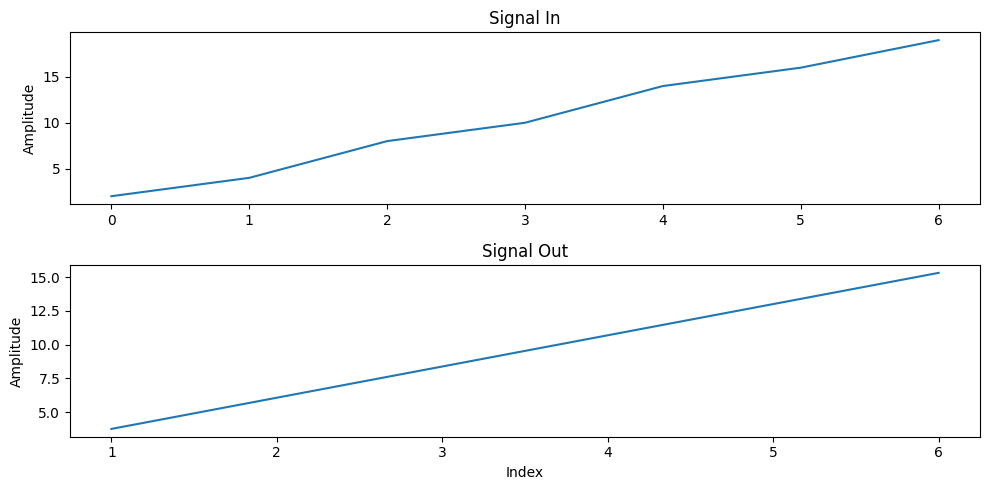

In [60]:
# Read data from file
data_file = "data.csv"
with open(data_file, "r") as file:
    lines = file.readlines()
d = []
for line in lines:
    d.append(int(line))

y = d
X = np.arange(0,len(y))

# Initialize parameters
m = 0.5  # Initial slope
b = 1.0  # Initial y-intercept
learning_rate = 0.0001
num_iterations = 1000

# Gradient Descent
for i in range(num_iterations):
    # Calculate predictions
    predictions = [m * xi + b for xi in X]

    # Calculate gradients
    dJ_dm = sum((predictions[i] - y[i]) * X[i] for i in range(len(X))) / len(X)
    dJ_db = sum(predictions[i] - y[i] for i in range(len(X))) / len(X)

    # Update parameters
    m -= learning_rate * dJ_dm
    b -= learning_rate * dJ_db

# Final parameters
print("Final slope (m):", m)
print("Final y-intercept (b):", b)

# Make predictions
new_X = np.arange(1,len(X))
predictions = [m * xi + b for xi in new_X]
print("Predictions for new data:", predictions)

# Plot signals on subplots
plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
plt.subplot(2, 1, 1)
plt.plot(X, y, linestyle='-')
plt.title('Signal In')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(new_X, predictions, linestyle='-')
plt.title('Signal Out')
plt.xlabel('Index')
plt.ylabel('Amplitude')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

Final coefficients:
a3: 7.8797, a2: 12.0269, a1: 6.6716, a0: 19.3192


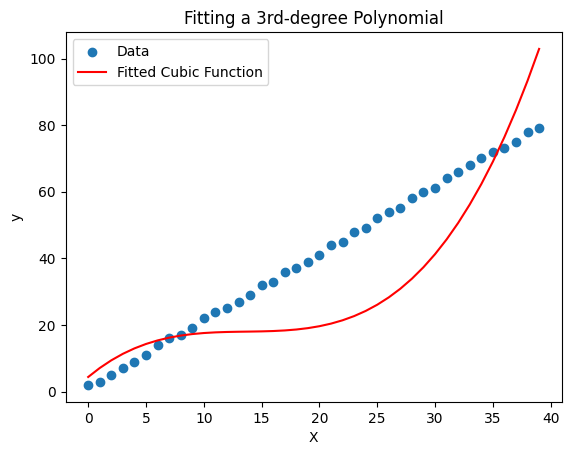

In [38]:
# Read data from file
data_file = "data.csv"
with open(data_file, "r") as file:
    lines = file.readlines()
d = []
for line in lines:
    d.append(int(line))

y = d
X = np.arange(0,len(y))

# Normalize X (feature scaling)
X_normalized = (X - np.mean(X)) / np.std(X)

# Initialize parameters
a3 = 0.0
a2 = 0.0
a1 = 0.0
a0 = 0.0

# Hyperparameters
learning_rate = 0.001
num_iterations = 1000

# Gradient Descent
for _ in range(num_iterations):
    # Calculate predictions
    predictions = a3 * X_normalized**3 + a2 * X_normalized**2 + a1 * X_normalized + a0

    # Calculate gradients
    dJ_da3 = np.mean((predictions - y) * X_normalized**3)
    dJ_da2 = np.mean((predictions - y) * X_normalized**2)
    dJ_da1 = np.mean((predictions - y) * X_normalized)
    dJ_da0 = np.mean(predictions - y)

    # Update parameters
    a3 -= learning_rate * dJ_da3
    a2 -= learning_rate * dJ_da2
    a1 -= learning_rate * dJ_da1
    a0 -= learning_rate * dJ_da0

# Final parameters
print("Final coefficients:")
print(f"a3: {a3:.4f}, a2: {a2:.4f}, a1: {a1:.4f}, a0: {a0:.4f}")

# Plot the data and the fitted cubic function
plt.scatter(X, y, label="Data")
plt.plot(X, a3 * X_normalized**3 + a2 * X_normalized**2 + a1 * X_normalized + a0, color='red', label="Fitted Cubic Function")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Fitting a 3rd-degree Polynomial")
plt.legend()
plt.show()

# Verilog gradient descent

In [71]:
# Compile Verilog files
compile_process = subprocess.run(["iverilog", "-g", "2012", "-o", "l", "LSR.sv", "LSR_tb.sv"], capture_output=True, text=True)

# Check if compilation was successful
if compile_process.returncode == 0:
    print("Compilation successful.")
else:
    print("Compilation failed.")
    print(compile_process.stderr)  # Print any error message from the compilation process

# Run the compiled file
if compile_process.returncode == 0:
    run_process = subprocess.run(["vvp", "l"], capture_output=True, text=True)
    
    # Print the output of the simulation
    print("Simulation output:")
    print(run_process.stdout)

Compilation successful.
Simulation output:
b:  20000
m:      0
b:  25536
m: -17920
b:  12768
m:  15872
b: -18080
m:   9728
b: -30848
m:  11776
b:   3840
m:   1536
b:  -8928
m: -28160
b:      0
m:     -2
LSR_tb.sv:62: $finish called at 1101000 (1ps)



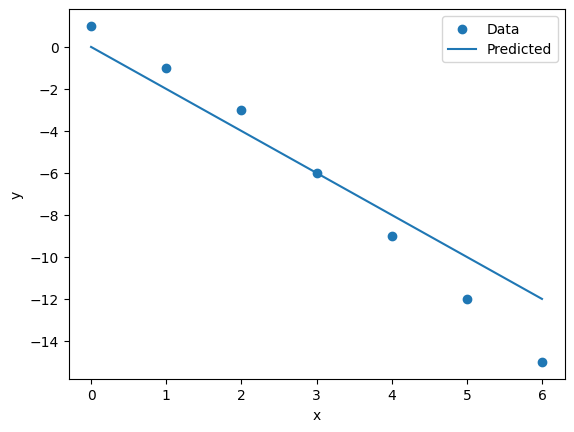

In [72]:
b=0
m=-2

data_file = "data.csv"
with open(data_file, "r") as file:
    lines = file.readlines()
d = []
for line in lines:
    d.append(int(line))
y = d
x = np.arange(0,len(y))
y_pred = m*x + b


plt.scatter(x, y, label="Data")
plt.plot(x, y_pred, label="Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()